- Reference
  - https://techblog.nhn-techorus.com/archives/8813

In [1]:
from tensorflow.keras.applications import ResNet50
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [2]:
resnet = ResNet50()

102973440/102967424 [==============================] - 3s 0us/step


In [4]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [5]:
#weights = resnet.get_layer("conv1").get_weights()[0]
weights = resnet.get_layer('conv1_conv').get_weights()[0]

In [6]:
weights.shape

(7, 7, 3, 64)

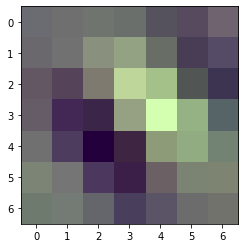

In [7]:
w = weights[:, :, ::-1, 0].copy()
m = w.min()
M = w.max()
w = (w-m)/(M-m)
plt.imshow(w)

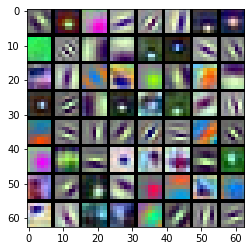

In [8]:
result = Image.new("RGB", (7*8+(8-1), 7*8+(8-1)))

for i in range(64):
    w= weights[:, :, ::-1, i].copy()
    M = w.max()
    m = w.min()
    w = (w-m)/(M-m)
    w *= 255
    img = Image.fromarray(w.astype("uint8"), mode="RGB")
    result.paste(img, (7*(i//8) + (i//8), 7*(i%8)+(i%8)))
 
plt.imshow(result)

In [9]:
weights = resnet.get_layer('conv2_block1_1_conv').get_weights()[0]
weights.shape

(1, 1, 64, 64)